In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
path = '/Volumes/Sandisk_SD/Work/IZFP/Laser/InSignA_campaign2/Code/npy_data/delta_t'

delays_list = []
for fname in os.listdir(path):
    delays_list.append(np.load(f'{path}/{fname}'))

delays = np.array(delays_list) #[s]

In [41]:
delays = delays*10**3 #[ms]

In [42]:
# Stats
mean = delays.mean() #[ms]
median = np.median(delays) #[ms]
std = delays.std() #[ms]

In [57]:
print(f'Mean = {mean}ms')
print(f'Median = {median}ms')
print(f'Std = {std}ms')

Mean = 23.456249999999994ms
Median = 23.3ms
Std = 5.108829563503618ms


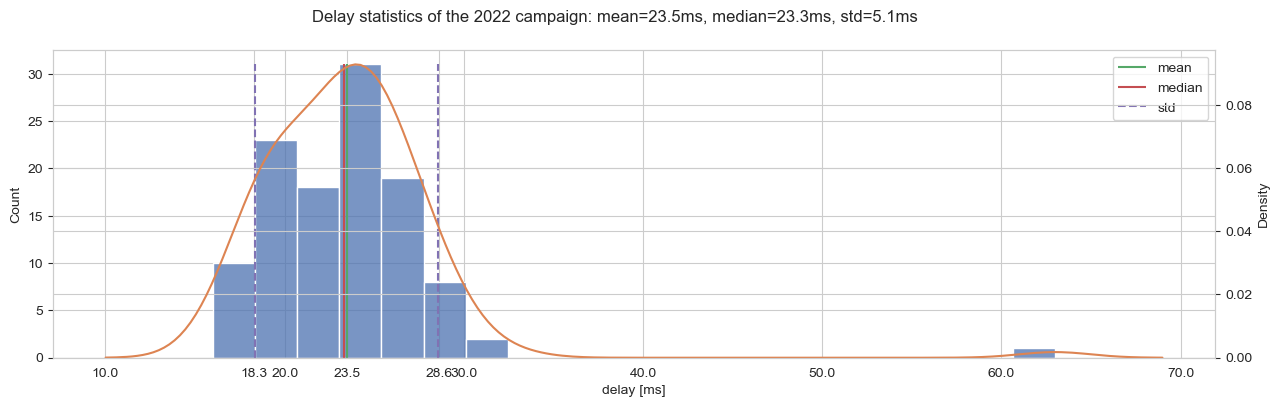

In [56]:
fig, ax1 = plt.subplots(1, 1, figsize=(15, 4))
plt.suptitle(f'Delay statistics of the 2022 campaign: mean={round(mean, 1)}ms, median={round(median, 1)}ms, std={round(std, 1)}ms')

sns.set_style("whitegrid")
sns.set_palette('deep')

# Distribution
sns.histplot(data=delays, ax=ax1, bins=20, color='C0')
#ax1.set_xlim((df["value"].min(), df["value"].max()))
ax2 = ax1.twinx()
sns.kdeplot(data=delays, ax=ax2, color='C1')
             
# Stats
ax1.vlines(x=mean, ymin=0, ymax=31, colors='C2', label='mean')
ax1.vlines(x=median, ymin=0, ymax=31, colors='C3', label='median')
ax1.vlines(x=[mean-std, mean+std], ymin=0, ymax=31, colors='C4', linestyles='--', label='std')

# Make it prettier
ax1.set_xlabel('delay [ms]')
ax1.set_xticks(
    [10, round(mean-std, 1), 20, round(mean, 1), round(mean+std, 1), 30, 40, 50, 60, 70])

ax1.legend(loc='upper right')

# Save
fname_plot = 'camp2_delay_stats.png'
plt.savefig(fname_plot, dpi = 150, bbox_inches = 'tight', pad_inches = 0.05) 

plt.show()